# trim_disconnected_blobs
``trim_disconnected_blobs`` is a function which removes blobs that are not connected to specified inlets.

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

## Generate Test Image
First an image is generated that can be used to demonstrate how to trim disconnected blobs. The ``RSA`` method is used to generate an image that is 100 by 100 in shape. The image is visualized by plotting using matplotlib's ``pyplot.imshow``.

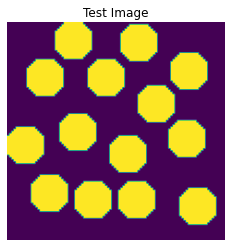

In [2]:
im = ps.generators.RSA(np.zeros([100, 100]), r=9, clearance=1)
plt.imshow(im);
plt.axis(False);
plt.title('Test Image');

## Specify Inlets
Next the location of the inlets are specified. Any voxels **not** connected directly to the inlets will be trimmed. The inlets can be specified as either a boolean mask with the same shape as the image or a tuple of indices. Here we specify the inlets as being located on the border of an image and do this using a boolean mask. We visualize the inlets by plotting the boolean array. 

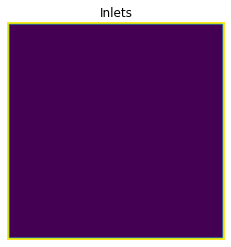

In [3]:
inlets = ps.tools.get_border(shape=im.shape, mode='faces')
plt.imshow(inlets);
plt.axis(False);
plt.title('Inlets');

## Apply Filter
The ``trim_disconnected_blobs`` filter is applied to the image using the border voxels as inlets. The filter returns image x which is the original image but with all blobs that are disconnected from the border removed.  The resulting image is plotted and the effect of removing blobs not connected to inlets are visualized. 

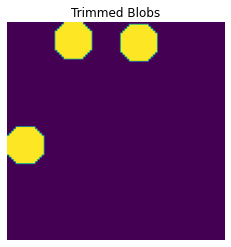

In [4]:
x = ps.filters.trim_disconnected_blobs(im=im, inlets=inlets)
plt.imshow(x);
plt.axis(False);
plt.title('Trimmed Blobs');